# This section presents the implemention and the analysis of the Neural Networks. 

Here, we employ the tensorflow and keras framework to implent the neural network. Considering that large dataset and lage model will incur considerable computation time, here, we take the MNIST dataset and a simple two-layer network.

## In the first part:
1. we import the necessary libraries and datasets, the classic MNIST handwritten digits dataset. This dataset contains grayscale images of handwritten digits from 0 to 9 and is a commonly used dataset used to demonstrate image recognition.
2. we display dataset shape and list the first few images. 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


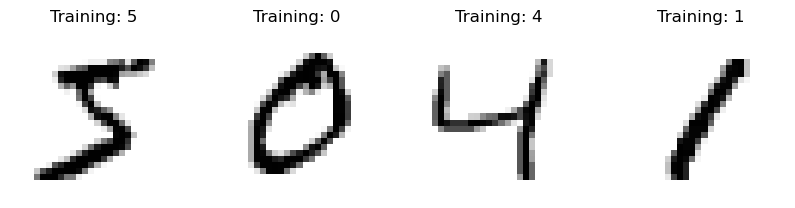

In [28]:
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Show the shape of the dataset to understand its structure
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

# Plotting the first few images of the dataset
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, train_images, train_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


## In the second part:

1. we normalize the dataset.

2. we define model structure:
    Input layer (Input): The shape of the model input is clearly defined as (28, 28), which is the size of each image in the MNIST dataset. 
    Flatten layer (Flatten): Convert the input two-dimensional image (28x28 pixels) into a one-dimensional array. This is because the fully connected layer (Dense) requires a one-dimensional input vector, and the Flatten layer can achieve this conversion.
    Fully connected layer (Dense): Two dense layers are added. The first layer has 128 neurons and uses relu (linear rectifier unit) as the activation function, which helps introduce nonlinearity and enables the model to learn more complex patterns. The last layer is the output layer, which has 10 neurons (corresponding to 10 numeric categories) and uses the softmax activation function, which can convert the output into a probability distribution to facilitate multi-classification.
    
3. we set some hyperparameters: the opt as the adam, an improved SGD, the loss function as the crossentropy, the training epoch is set to 1. As we employed adam, the learning rate will be dynamic adjusted.

4. we train the model and plot accuracy during training and validation to graphically demonstrate model learning progress and performance improvements.


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.5633 - loss: 1.7214 - val_accuracy: 0.8747 - val_loss: 0.5716
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.8536 - loss: 0.5715 - val_accuracy: 0.9070 - val_loss: 0.3717
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.8863 - loss: 0.4212 - val_accuracy: 0.9182 - val_loss: 0.3115
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.8968 - loss: 0.3673 - val_accuracy: 0.9213 - val_loss: 0.2833
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9020 - loss: 0.3438 - val_accuracy: 0.9258 - val_loss: 0.2643
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.9074 - loss: 0.3215 - val_accuracy: 0.9270 - val_loss: 0.2534
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.9133 - loss: 0.3060 - val_accuracy: 0.9310 - val_loss: 0.2405
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9170 -

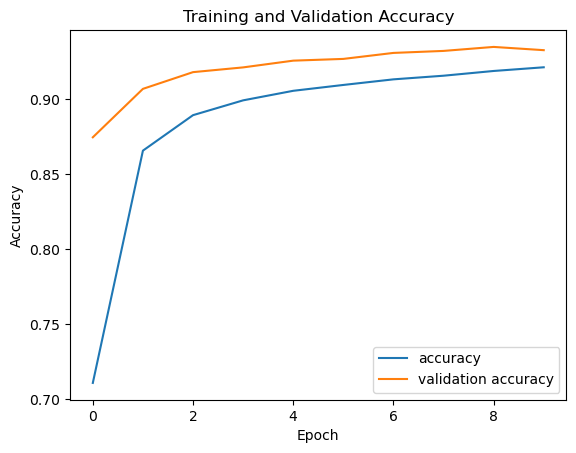

In [30]:
# Import libraries for building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# Normalize the image data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the neural network model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()





## In the third part:
1. we use the trained model to make predictions on the test set.
2. we evaluate model performance by showing accuracy and the confusion matrix to show how the model performs on three different categories. Here, we can observe that the accuracy is 92%.

313/313 - 0s - 437us/step - accuracy: 0.9214 - loss: 0.2681

Test accuracy: 0.9214000105857849
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


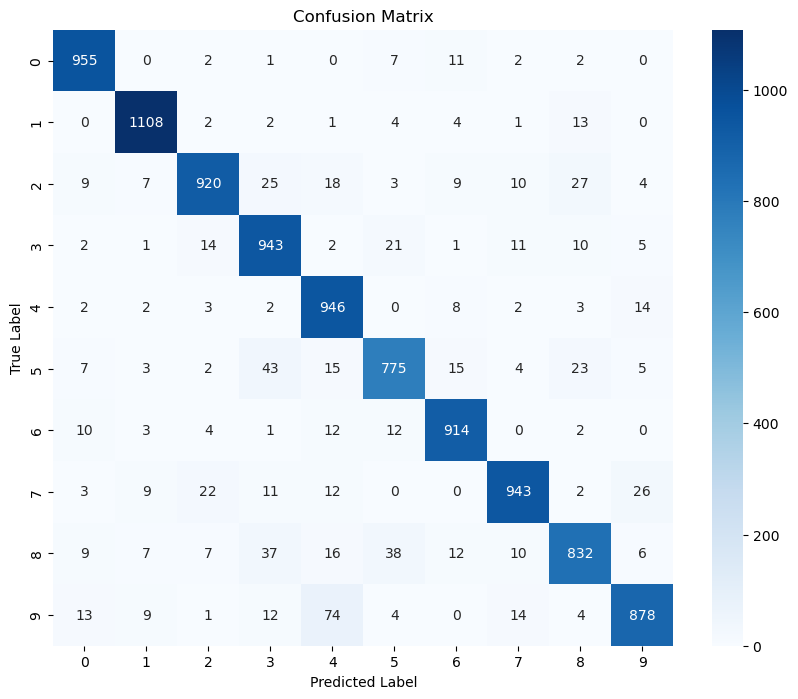

In [31]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Import libraries for model visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



## Analysis part 1:
Here, we further analyze the different implementation details.

1. We change the optimizer to the naive SGD and set an improper large learning rate 0.5.

2. we can observe that the model can not learn any knowledge. 

   Reason:  
   
   The learning rate controls how much we adjust the weights of our network with respect to the loss gradient. Essentially, it determines the size of the steps taken towards minimizing the loss function during training. When the learning rate is set too high, several issues can impede the effective training of the model.
   
   Overshooting the Minimum: Ideally, training should lead us to the minimum of the loss function. A high learning rate can cause the training process to overshoot this minimum. Instead of converging to the lowest point, the optimizer might end up on the other side of the curve, possibly even higher than where it started.
   
   Divergence: If the learning rate is excessively high, instead of minimizing the loss, the model's training can diverge. This means each update makes the solution worse, increasing the loss instead of decreasing it. The weights may update in such large increments that the loss becomes exceedingly large, manifesting as NaN (Not a Number) values in computations.
   
   High Variance in Updates: With a high learning rate, the updates to the weights can vary significantly. This high variance can lead the training process to become unstable, constantly bouncing around the loss landscape and never settling in a minimum.
   
   Failure to Converge: Even if the model with a high learning rate does not diverge, it might keep oscillating around the minimum without ever settling down. The steps taken are too large to allow the model to fine-tune its position in the parameter space effectively.
   

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.1046 - loss: 2.3050 - val_accuracy: 0.0960 - val_loss: 2.3054
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.1073 - loss: 2.3046 - val_accuracy: 0.1050 - val_loss: 2.3094
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.1092 - loss: 2.3054 - val_accuracy: 0.0992 - val_loss: 2.3065
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.1055 - loss: 2.3048 - val_accuracy: 0.1050 - val_loss: 2.3063
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.1057 - loss: 2.3046 - val_accuracy: 0.1050 - val_loss: 2.3042
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.1052 - loss: 2.3041 - val_accuracy: 0.1050 - val_loss: 2.3070
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.1075 - loss: 2.3051 - val_accuracy: 0.1050 - val_loss: 2.3036
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.1095 -

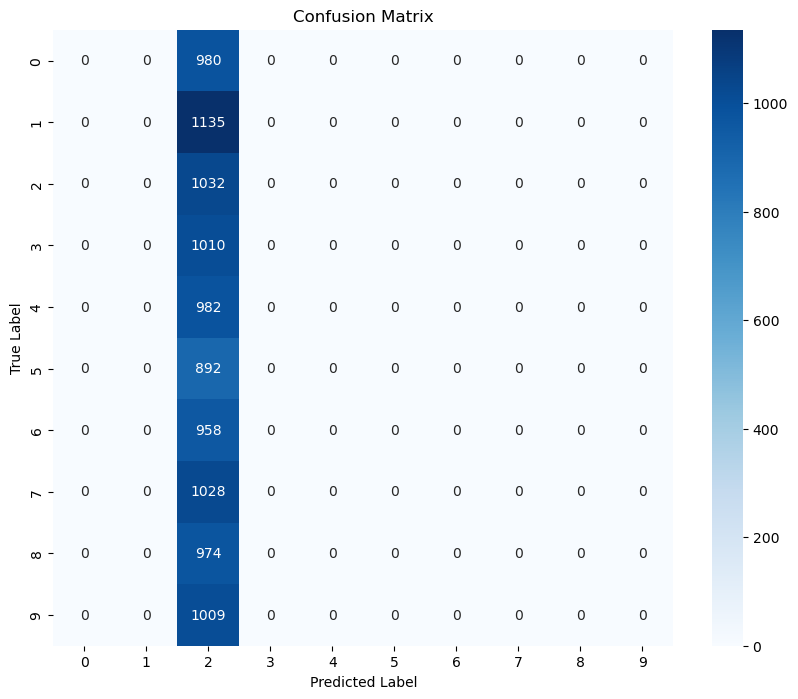

In [33]:
# Import libraries for building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD

# Normalize the image data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the neural network model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.5),  # Specify the learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Import libraries for model visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Analysis part 2:

1. We change the optimizer to the naive SGD and set an improper small learning rate 0.00001.

2. we can observe that the model performance is not good as well. 

    Slow Convergence: The most apparent effect of a small learning rate is that it can significantly slow down the training process. Since the updates to the weights are minimal, the algorithm takes smaller steps toward the minimum of the loss function. This means it will require more iterations or epochs to achieve convergence, which can be computationally expensive and time-consuming.
    
    Getting Stuck in Local Minima: A smaller learning rate increases the risk of the optimization algorithm getting stuck in local minima or saddle points, particularly in complex loss landscapes typical of deep neural networks. These are points where the model stops improving significantly, but they are not necessarily the best or the global minimum.
    
    ### Based on the training process log, I think the reason is that the convergence speed is slow. Thus, the training needs more learning epochs. 
   

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.1120 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.1126 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.1144 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.1125 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.1131 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.1137 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.1154 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.1108 -

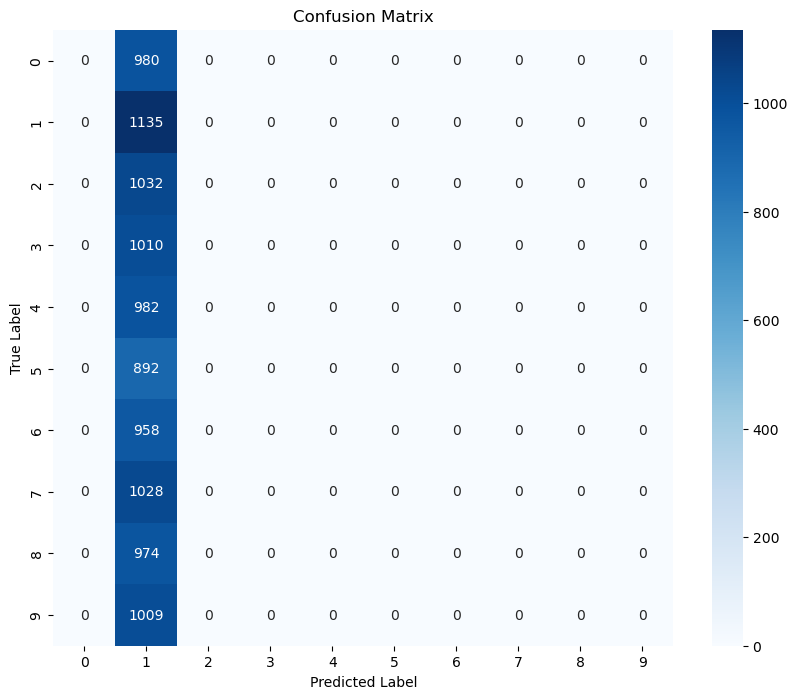

In [35]:
# Import libraries for building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD

# Normalize the image data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the neural network model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.00001),  # Specify the learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Import libraries for model visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()